Data from loss_response_times.csv:
   Request  Response Time (s)
0        1           0.015096
1        2           0.002009
2        3           0.001613
3        4           8.336677
4        5           9.790259


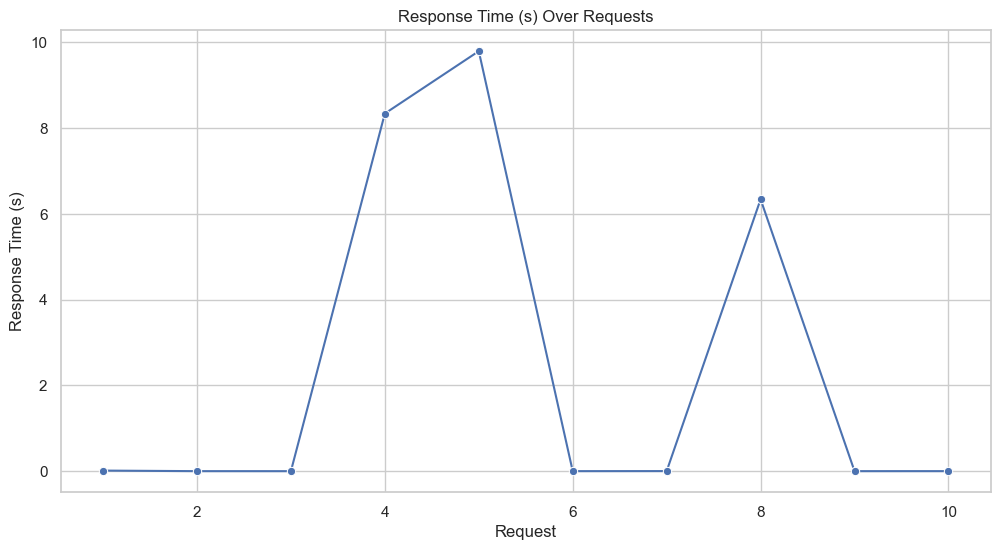

Statistical Summary for Response Time (s):
                   count      mean       std       min       25%       50%  \
Request             10.0  2.449289  4.021098  0.001613  3.250000  5.500000   
Response Time (s)   10.0  2.449289  4.021098  0.001613  0.002034  0.002833   

                       75%       max  
Request            7.75000  9.790259  
Response Time (s)  4.75688  9.790259  


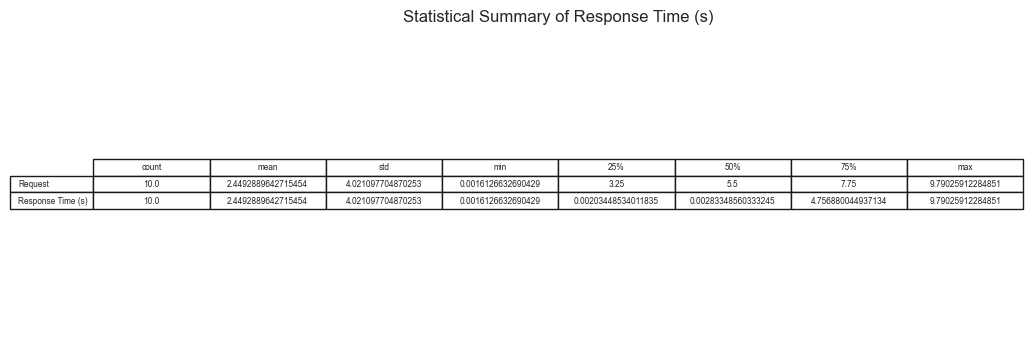

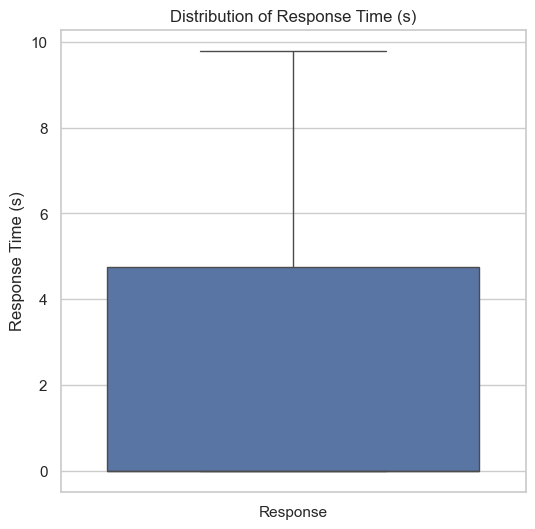

Data from delay_response_times.csv:
   Request  Response Time (s)
0        1           0.102551
1        2           0.102120
2        3           0.103054
3        4           0.102826
4        5           0.104055


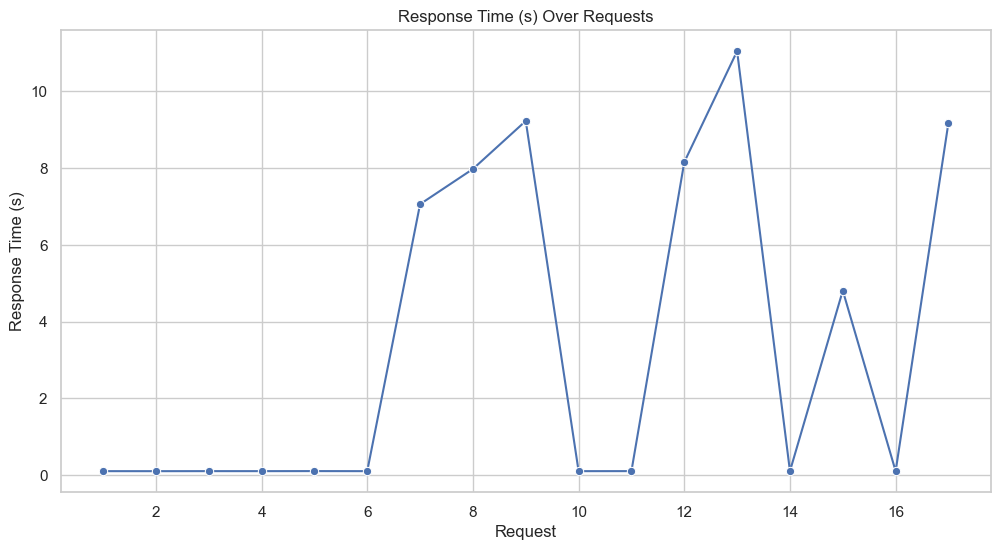

Statistical Summary for Response Time (s):
                   count      mean       std      min      25%       50%  \
Request             17.0  3.440187  4.282796  0.10212  5.00000  9.000000   
Response Time (s)   17.0  3.440187  4.282796  0.10212  0.10258  0.103663   

                         75%       max  
Request            13.000000  11.04551  
Response Time (s)   7.975389  11.04551  


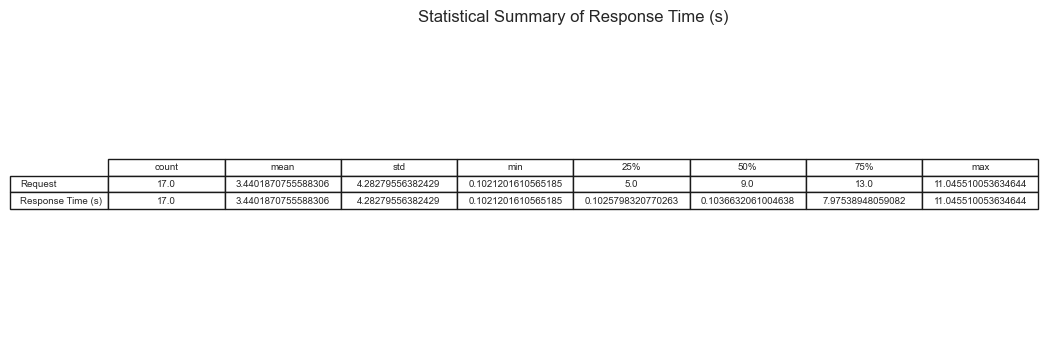

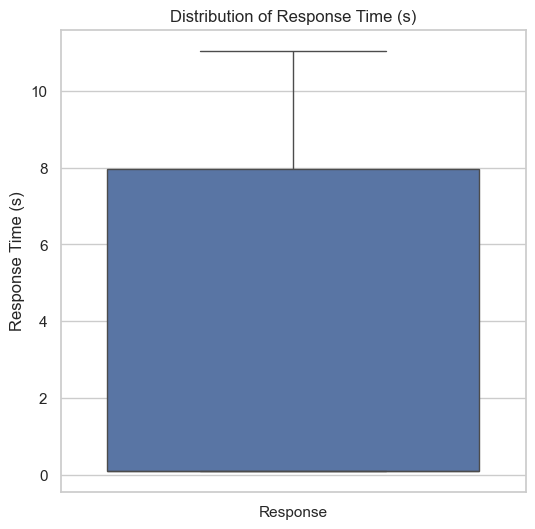

Data from bandwidth_response_times.csv:
   Request  Response Time (s)
0        1           0.002583
1        2           0.003326
2        3           3.909863
3        4           4.730148
4        5           0.003037


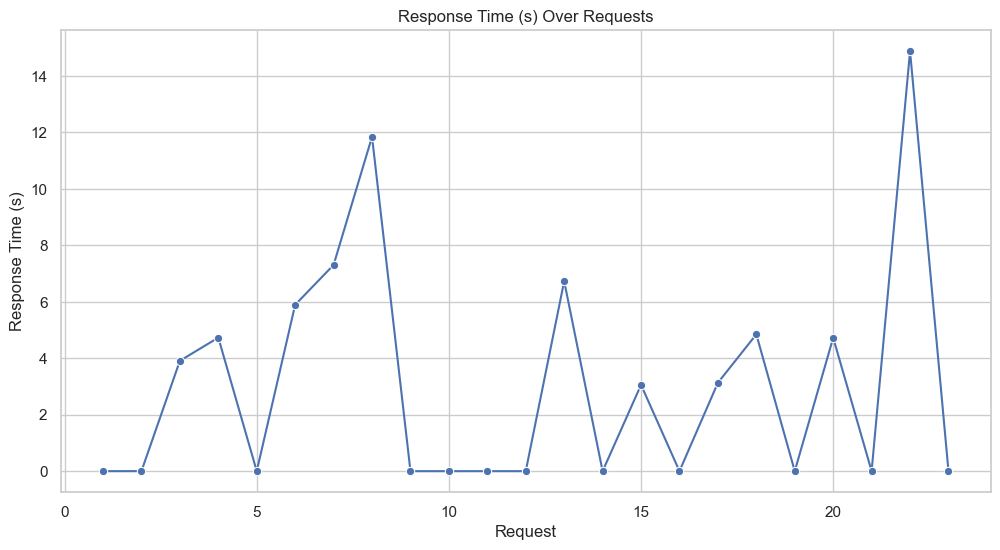

Statistical Summary for Response Time (s):
                   count      mean       std       min       25%        50%  \
Request             23.0  3.090273  4.144056  0.001785  6.500000  12.000000   
Response Time (s)   23.0  3.090273  4.144056  0.001785  0.002409   0.003372   

                         75%        max  
Request            17.500000  14.873294  
Response Time (s)   4.788615  14.873294  


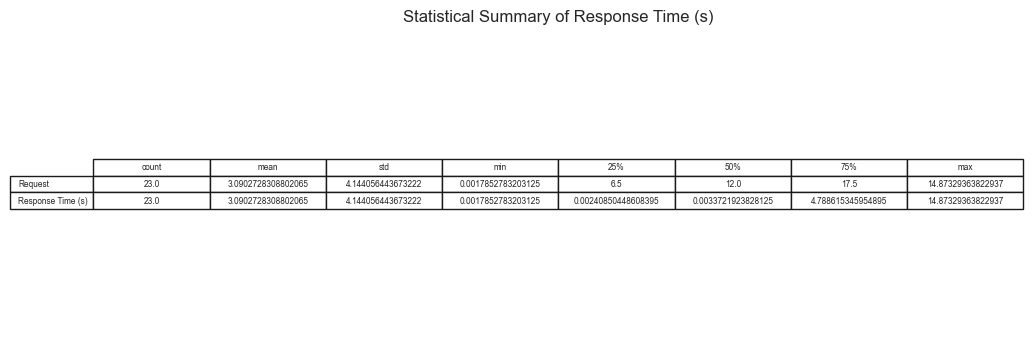

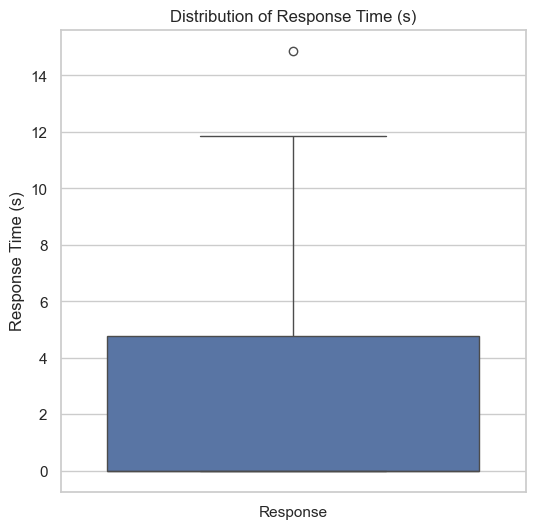

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

file_info = [
    ('loss_response_times.csv', 'Response Time (s)'),
    ('delay_response_times.csv', 'Response Time (s)'),
    ('bandwidth_response_times.csv', 'Response Time (s)')
]

for file_name, column_name in file_info:
    data = pd.read_csv(file_name)
    
    print(f"Data from {file_name}:")
    print(data.head())
    
    # Plot response times
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Request', y='Response Time (s)', data=data, marker='o')
    plt.title(f'{column_name} Over Requests')
    plt.ylabel('Response Time (s)')
    plt.xlabel('Request')
    plt.show()
    
    # Calculate statistical metrics for the response times
    stats = data.describe().transpose()
    stats['mean'] = data['Response Time (s)'].mean()
    stats['std'] = data['Response Time (s)'].std()
    stats['min'] = data['Response Time (s)'].min()
    stats['max'] = data['Response Time (s)'].max()
    
    # Display the statistical summary
    print(f"Statistical Summary for {column_name}:")
    print(stats)
    
    # Visualize the statistical summary as a table
    plt.figure(figsize=(12, 4))
    plt.axis('off')
    plt.table(cellText=stats.values, colLabels=stats.columns, rowLabels=stats.index, cellLoc='center', loc='center', fontsize=12)
    plt.title(f'Statistical Summary of {column_name}')
    plt.show()
    
    # Boxplot to show distribution of response times
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=data[['Response Time (s)']])
    plt.title(f'Distribution of {column_name}')
    plt.ylabel('Response Time (s)')
    plt.xticks([0], [column_name.split()[0]])  # Show the metric name on x-axis
    plt.show()

Combined Data:
   Request  Response Time (s)  Type
0        1           0.015096  Loss
1        2           0.002009  Loss
2        3           0.001613  Loss
3        4           8.336677  Loss
4        5           9.790259  Loss


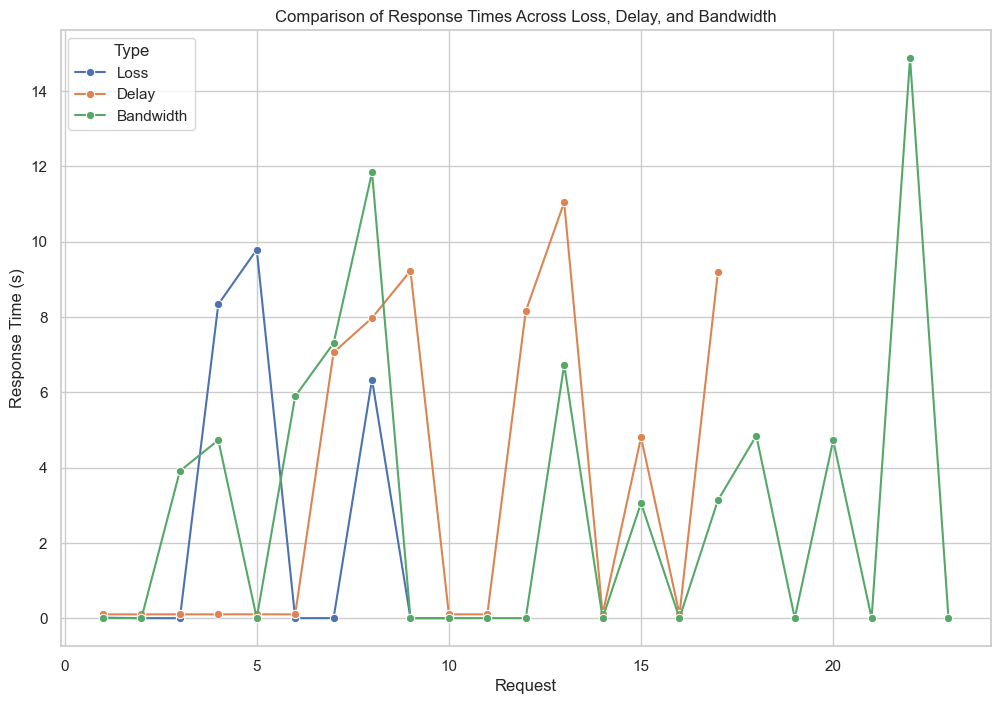

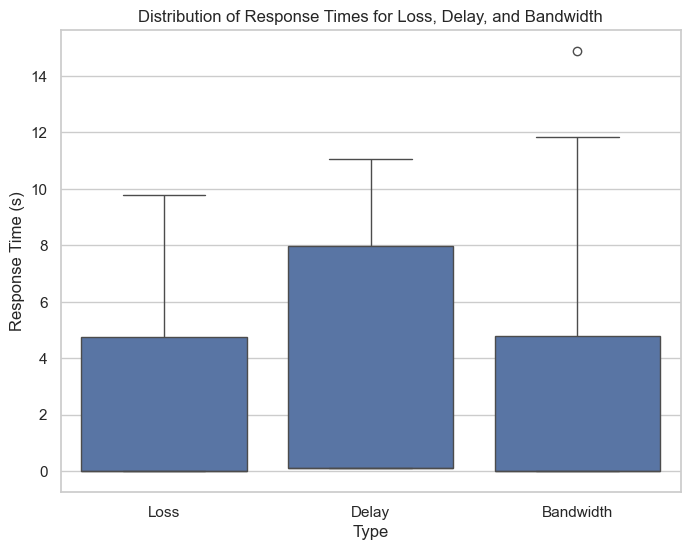

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style='whitegrid')

# List of file names and corresponding labels
file_info = [
    ('loss_response_times.csv', 'Loss'),
    ('delay_response_times.csv', 'Delay'),
    ('bandwidth_response_times.csv', 'Bandwidth')
]

# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Read each file and append data to the combined DataFrame
for file_name, label in file_info:
    data = pd.read_csv(file_name)
    data['Type'] = label  # Add a new column to identify the type (Loss, Delay, Bandwidth)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Display the first few rows of the combined data
print("Combined Data:")
print(combined_data.head())

# Plot comparison of response times
plt.figure(figsize=(12, 8))
sns.lineplot(x='Request', y='Response Time (s)', hue='Type', data=combined_data, marker='o')
plt.title('Comparison of Response Times Across Loss, Delay, and Bandwidth')
plt.ylabel('Response Time (s)')
plt.xlabel('Request')
plt.legend(title='Type')
plt.show()

# Boxplot to show distribution of response times for each type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Response Time (s)', data=combined_data)
plt.title('Distribution of Response Times for Loss, Delay, and Bandwidth')
plt.ylabel('Response Time (s)')
plt.xlabel('Type')
plt.show()